<a href="https://colab.research.google.com/github/maskot1977/ComputerExercises2022/blob/TMAXhLKBhdng2/1%E6%9C%8810%E6%97%A5%E8%AC%9B%E7%BE%A9%E5%88%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!date

Mon Jan  9 23:24:26 UTC 2023


# 第100章：アンケートデータ分析

In [2]:
import gspread
print(gspread.__version__)

3.4.2


In [3]:
from google.colab import auth
from oauth2client.client import GoogleCredentials
import gspread

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

TypeError: ignored

In [4]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [5]:
ss_url = "https://docs.google.com/spreadsheets/d/1u50kS8Ztmgjjs--S1AM4753quL3QEPRR7xIGjCxcSCw/edit#gid=941271295"

In [6]:
workbook = gc.open_by_url(ss_url)
workbook

<Spreadsheet 'Questionary' id:1u50kS8Ztmgjjs--S1AM4753quL3QEPRR7xIGjCxcSCw>

In [7]:
worksheet = workbook.get_worksheet(0)
worksheet

<Worksheet 'Form Responses 1' id:941271295>

In [8]:
import gspread_dataframe as gs_df
df = gs_df.get_as_dataframe(worksheet)
df

,Timestamp,Score,Pen name,Q1. Gender,Q2. 高校時代の英語の偏差値はどのくらい？,Q3. 高校時代の国語の偏差値はどのくらい？,Q4. 高校時代の数学の偏差値はどのくらい？,Q5. 高校時代の理科の偏差値はどのくらい？,Q6. 高校時代の社会の偏差値はどのくらい？,Q7. 高校時代の体育の成績を５段階評価で表すと？,...,Q12. 大学への通学時間は？（単位：分）,Q13. 朝ごはんは週何回くらい食べてる？,Q14. １日あたりの睡眠時間は平均何時間？,Q15. 大学の成績(GPA)は？,Q16. 今、バイトは週何時間くらい？,Q17. 部活（またはサークル活動）は週何時間？,Q18. 彼氏または彼女はいる？,Q19. あなたはリア充ですか？５段階評価で,Unnamed: 22,Q20. 上記以外に、加えて欲しい質問項目などがありましたら教えてください。
0,5/18/2017 13:28:25,0.0,pp,男性 Male,50,50,55,60,60,4.0,...,60,7,6,2.8,4,20,いる（２次元）,2.0,NaN,NaN
1,5/18/2017 13:28:37,0.0,chimp,男性 Male,70,60,70,70,60,4.0,...,90,7,5,3.2,6.5,6,いない,1.0,NaN,NaN
2,5/18/2017 13:37:00,0.0,あんぱん,男性 Male,80,70,65,70,50,5.0,...,90,7,6,2.4,0,15,いない,3.0,NaN,NaN
3,5/18/2017 13:40:12,0.0,あかさたな,男性 Male,40,50,55,55,50,3.0,...,30,5,6,2,10,8,いる（リアル）,2.0,NaN,NaN
4,5/18/2017 13:37:35,0.0,rrr,男性 Male,65,60,70,65,50,5.0,...,120,7,6,2.8,12,2,いない,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df2 = df[~df['Timestamp'].isnull()]
df2

,Timestamp,Score,Pen name,Q1. Gender,Q2. 高校時代の英語の偏差値はどのくらい？,Q3. 高校時代の国語の偏差値はどのくらい？,Q4. 高校時代の数学の偏差値はどのくらい？,Q5. 高校時代の理科の偏差値はどのくらい？,Q6. 高校時代の社会の偏差値はどのくらい？,Q7. 高校時代の体育の成績を５段階評価で表すと？,...,Q12. 大学への通学時間は？（単位：分）,Q13. 朝ごはんは週何回くらい食べてる？,Q14. １日あたりの睡眠時間は平均何時間？,Q15. 大学の成績(GPA)は？,Q16. 今、バイトは週何時間くらい？,Q17. 部活（またはサークル活動）は週何時間？,Q18. 彼氏または彼女はいる？,Q19. あなたはリア充ですか？５段階評価で,Unnamed: 22,Q20. 上記以外に、加えて欲しい質問項目などがありましたら教えてください。
0,5/18/2017 13:28:25,0.0,pp,男性 Male,50,50,55,60,60,4.0,...,60,7,6,2.8,4,20,いる（２次元）,2.0,NaN,NaN
1,5/18/2017 13:28:37,0.0,chimp,男性 Male,70,60,70,70,60,4.0,...,90,7,5,3.2,6.5,6,いない,1.0,NaN,NaN
2,5/18/2017 13:37:00,0.0,あんぱん,男性 Male,80,70,65,70,50,5.0,...,90,7,6,2.4,0,15,いない,3.0,NaN,NaN
3,5/18/2017 13:40:12,0.0,あかさたな,男性 Male,40,50,55,55,50,3.0,...,30,5,6,2,10,8,いる（リアル）,2.0,NaN,NaN
4,5/18/2017 13:37:35,0.0,rrr,男性 Male,65,60,70,65,50,5.0,...,120,7,6,2.8,12,2,いない,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,10/21/2022 13:35:04,0.0,kioooooo,男性 Male,80,55,50,60,50,5.0,...,10,7,7,3.4,30,6,いる（２次元）,4.0,NaN,NaN
1163,10/25/2022 21:14:57,0.0,pyon,女性 Female,65,65,70,70,60,3.0,...,60,3,7,4.3,6,0,いる（リアル）,3.0,NaN,NaN
1164,10/27/2022 15:53:50,0.0,qwert,女性 Female,75,50,60,60,55,5.0,...,60,4,5,2.24,5,12,NaN,3.0,NaN,NaN
1165,10/28/2022 0:49:11,0.0,shun,男性 Male,65,70,75,75,65,3.0,...,10,3,7,3.3,40,1,いる（リアル）,4.0,NaN,NaN


TypeError: ignored

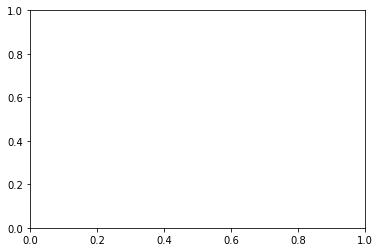

In [10]:
# 数字を入力すべき場所に数字ではない文字が入力されているなどのエラーにより、計算ができない

df2["Q12. 大学への通学時間は？（単位：分）"].hist()

In [11]:
df2["Q12. 大学への通学時間は？（単位：分）"].astype("float").hist()

ValueError: ignored

In [13]:
# 入力エラーを起こしてる人のデータを使わないことにする
import pandas as pd

clean_data = []
for data in df.values:
    contains_error = False
    for i in [4, 5, 6, 7, 8, 9, 10, 14, 15, 16, 17, 18, 19, 21]: # these columns should be numeric
        if pd.isnull(data[i]):
            contains_error = True
            break
        try:
            data[i] = float(data[i])
        except:
            contains_error = True
            break
    if contains_error:
        continue
    else:
        clean_data.append(data)

In [14]:
import pandas as pd

df3 = pd.DataFrame(clean_data)
df3.columns = df2.columns
df3

,Timestamp,Score,Pen name,Q1. Gender,Q2. 高校時代の英語の偏差値はどのくらい？,Q3. 高校時代の国語の偏差値はどのくらい？,Q4. 高校時代の数学の偏差値はどのくらい？,Q5. 高校時代の理科の偏差値はどのくらい？,Q6. 高校時代の社会の偏差値はどのくらい？,Q7. 高校時代の体育の成績を５段階評価で表すと？,...,Q12. 大学への通学時間は？（単位：分）,Q13. 朝ごはんは週何回くらい食べてる？,Q14. １日あたりの睡眠時間は平均何時間？,Q15. 大学の成績(GPA)は？,Q16. 今、バイトは週何時間くらい？,Q17. 部活（またはサークル活動）は週何時間？,Q18. 彼氏または彼女はいる？,Q19. あなたはリア充ですか？５段階評価で,Unnamed: 22,Q20. 上記以外に、加えて欲しい質問項目などがありましたら教えてください。
0,5/18/2017 13:28:25,0.0,pp,男性 Male,50.0,50.0,55.0,60.0,60.0,4.0,...,60.0,7.0,6.0,2.80,4.0,20.0,いる（２次元）,2.0,NaN,NaN
1,5/18/2017 13:28:37,0.0,chimp,男性 Male,70.0,60.0,70.0,70.0,60.0,4.0,...,90.0,7.0,5.0,3.20,6.5,6.0,いない,1.0,NaN,NaN
2,5/18/2017 13:37:00,0.0,あんぱん,男性 Male,80.0,70.0,65.0,70.0,50.0,5.0,...,90.0,7.0,6.0,2.40,0.0,15.0,いない,3.0,NaN,NaN
3,5/18/2017 13:40:12,0.0,あかさたな,男性 Male,40.0,50.0,55.0,55.0,50.0,3.0,...,30.0,5.0,6.0,2.00,10.0,8.0,いる（リアル）,2.0,NaN,NaN
4,5/18/2017 13:37:35,0.0,rrr,男性 Male,65.0,60.0,70.0,65.0,50.0,5.0,...,120.0,7.0,6.0,2.80,12.0,2.0,いない,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,10/21/2022 13:35:04,0.0,kioooooo,男性 Male,80.0,55.0,50.0,60.0,50.0,5.0,...,10.0,7.0,7.0,3.40,30.0,6.0,いる（２次元）,4.0,NaN,NaN
943,10/25/2022 21:14:57,0.0,pyon,女性 Female,65.0,65.0,70.0,70.0,60.0,3.0,...,60.0,3.0,7.0,4.30,6.0,0.0,いる（リアル）,3.0,NaN,NaN
944,10/27/2022 15:53:50,0.0,qwert,女性 Female,75.0,50.0,60.0,60.0,55.0,5.0,...,60.0,4.0,5.0,2.24,5.0,12.0,NaN,3.0,NaN,NaN
945,10/28/2022 0:49:11,0.0,shun,男性 Male,65.0,70.0,75.0,75.0,65.0,3.0,...,10.0,3.0,7.0,3.30,40.0,1.0,いる（リアル）,4.0,NaN,NaN


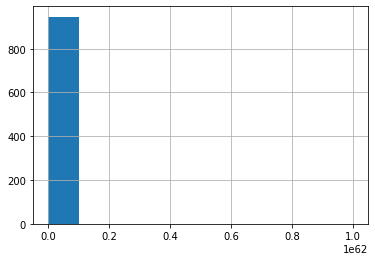

In [15]:
# 異常に大きい数字など（外れ値）を入力してる人などの影響により、統計的な解釈ができない。

df3["Q12. 大学への通学時間は？（単位：分）"].hist()

In [16]:
# 外れ値を排除する（この方法がベストとは限らない）

outlier_df = pd.DataFrame()

colnames = [
            "Q12. 大学への通学時間は？（単位：分）",
            "Q13. 朝ごはんは週何回くらい食べてる？",
            "Q14. １日あたりの睡眠時間は平均何時間？",
            "Q15. 大学の成績(GPA)は？",
            "Q16. 今、バイトは週何時間くらい？",
            "Q17. 部活（またはサークル活動）は週何時間？"
            ]

for colname in colnames:
    outlier_min = df3[colname].describe()['50%'] - df3[colname].describe()['25%'] * 5
    outlier_max = df3[colname].describe()['50%'] + df3[colname].describe()['75%'] * 5
    outlier = df3[colname].apply(lambda x: x <= outlier_min or x >= outlier_max)
    outlier_df[colname] = outlier

outlier_df

,Q12. 大学への通学時間は？（単位：分）,Q13. 朝ごはんは週何回くらい食べてる？,Q14. １日あたりの睡眠時間は平均何時間？,Q15. 大学の成績(GPA)は？,Q16. 今、バイトは週何時間くらい？,Q17. 部活（またはサークル活動）は週何時間？
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
942,False,False,False,False,False,False
943,False,False,False,False,False,True
944,False,False,False,False,False,False
945,False,False,False,False,False,True


In [17]:
print(list(outlier_df.sum(axis=1)))

[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 3, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 1, 3, 4, 2, 3, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 3, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 

In [18]:
valid_ids = [i for i, x in enumerate(list(outlier_df.sum(axis=1))) if x == 0]
print(valid_ids)

[0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 14, 16, 18, 19, 20, 21, 22, 26, 28, 29, 30, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 55, 57, 58, 59, 60, 61, 62, 63, 65, 66, 68, 69, 70, 72, 74, 75, 76, 82, 86, 88, 91, 93, 96, 101, 102, 104, 116, 117, 119, 122, 124, 125, 126, 128, 130, 131, 133, 136, 139, 140, 141, 142, 144, 151, 152, 153, 155, 156, 157, 158, 161, 166, 167, 168, 170, 171, 172, 173, 174, 176, 177, 178, 182, 183, 186, 188, 190, 191, 192, 195, 198, 199, 201, 202, 204, 205, 206, 214, 215, 217, 222, 226, 230, 233, 234, 239, 243, 244, 245, 246, 250, 251, 252, 254, 257, 259, 260, 261, 267, 268, 269, 271, 272, 273, 276, 278, 279, 282, 286, 288, 291, 296, 299, 305, 308, 311, 313, 314, 315, 317, 318, 322, 323, 326, 330, 334, 337, 342, 345, 348, 349, 353, 356, 359, 361, 363, 364, 366, 367, 368, 369, 370, 374, 375, 376, 377, 383, 391, 392, 396, 397, 398, 399, 403, 404, 405, 406, 407, 409, 410, 412, 413, 414, 415, 419, 421, 423, 426, 427, 428, 430, 434, 435, 441, 

In [19]:
df4 = df3.iloc[valid_ids, :]
df4

,Timestamp,Score,Pen name,Q1. Gender,Q2. 高校時代の英語の偏差値はどのくらい？,Q3. 高校時代の国語の偏差値はどのくらい？,Q4. 高校時代の数学の偏差値はどのくらい？,Q5. 高校時代の理科の偏差値はどのくらい？,Q6. 高校時代の社会の偏差値はどのくらい？,Q7. 高校時代の体育の成績を５段階評価で表すと？,...,Q12. 大学への通学時間は？（単位：分）,Q13. 朝ごはんは週何回くらい食べてる？,Q14. １日あたりの睡眠時間は平均何時間？,Q15. 大学の成績(GPA)は？,Q16. 今、バイトは週何時間くらい？,Q17. 部活（またはサークル活動）は週何時間？,Q18. 彼氏または彼女はいる？,Q19. あなたはリア充ですか？５段階評価で,Unnamed: 22,Q20. 上記以外に、加えて欲しい質問項目などがありましたら教えてください。
0,5/18/2017 13:28:25,0.0,pp,男性 Male,50.0,50.0,55.0,60.0,60.0,4.0,...,60.0,7.0,6.0,2.80,4.0,20.0,いる（２次元）,2.0,NaN,NaN
1,5/18/2017 13:28:37,0.0,chimp,男性 Male,70.0,60.0,70.0,70.0,60.0,4.0,...,90.0,7.0,5.0,3.20,6.5,6.0,いない,1.0,NaN,NaN
2,5/18/2017 13:37:00,0.0,あんぱん,男性 Male,80.0,70.0,65.0,70.0,50.0,5.0,...,90.0,7.0,6.0,2.40,0.0,15.0,いない,3.0,NaN,NaN
3,5/18/2017 13:40:12,0.0,あかさたな,男性 Male,40.0,50.0,55.0,55.0,50.0,3.0,...,30.0,5.0,6.0,2.00,10.0,8.0,いる（リアル）,2.0,NaN,NaN
5,5/18/2017 13:37:15,0.0,com,男性 Male,58.0,50.0,60.0,60.0,50.0,4.0,...,90.0,7.0,7.0,2.60,2.0,10.0,いる（リアル）,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,10/17/2022 13:13:38,0.0,さかな,男性 Male,72.0,54.0,72.0,72.0,46.0,3.0,...,50.0,1.0,8.0,3.20,6.0,15.0,いない,3.0,NaN,NaN
939,10/17/2022 14:01:13,0.0,ほあ,男性 Male,65.0,70.0,65.0,60.0,70.0,4.0,...,60.0,3.0,6.0,2.20,2.0,20.0,いる（リアル）,4.0,NaN,NaN
942,10/21/2022 13:35:04,0.0,kioooooo,男性 Male,80.0,55.0,50.0,60.0,50.0,5.0,...,10.0,7.0,7.0,3.40,30.0,6.0,いる（２次元）,4.0,NaN,NaN
944,10/27/2022 15:53:50,0.0,qwert,女性 Female,75.0,50.0,60.0,60.0,55.0,5.0,...,60.0,4.0,5.0,2.24,5.0,12.0,NaN,3.0,NaN,NaN


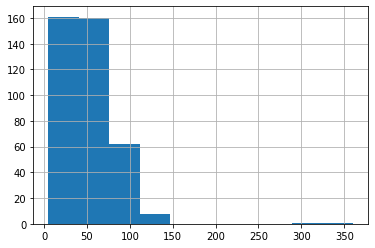

In [20]:
# これで、異常なデータは排除できた、かもしれない。

df4["Q12. 大学への通学時間は？（単位：分）"].hist()

# 第99章：ポケモンデータ分析

In [21]:
!wget https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/Pokemon.csv

--2023-01-09 23:51:48--  https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/Pokemon.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44028 (43K) [text/plain]
Saving to: ‘Pokemon.csv’

Pokemon.csv         100%[===================>]  43.00K  --.-KB/s    in 0.01s   

2023-01-09 23:51:49 (4.25 MB/s) - ‘Pokemon.csv’ saved [44028/44028]



In [25]:
import pandas as pd

df = pd.read_csv("Pokemon.csv")
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [26]:
df.head() # 先頭５行を表示

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [27]:
df.head(50).style.bar(subset=['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,nan,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,nan,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,nan,314,44,48,65,50,64,43,1,False


In [28]:
df.describe() # 平均値、標準偏差、最小値、25%四分値、中央値、75%四分値、最大値をまとめて表示

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [29]:
# Jupyter 上で絵を表示するためのマジックコマンド
%matplotlib inline 
import matplotlib.pyplot as plt # matplotlib.pyplot をインポートし、以下 plt と呼ぶ。

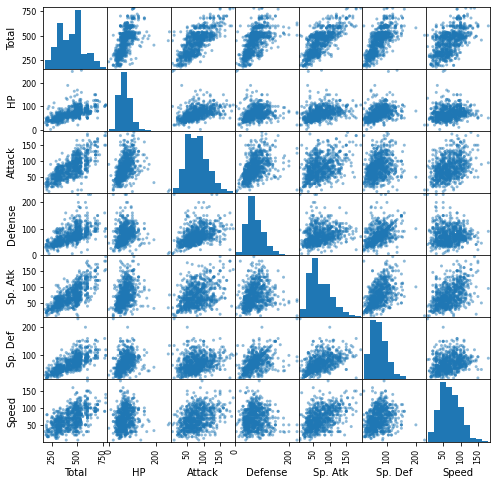

In [31]:
# 散布図行列
#from pandas.tools import plotting 
from pandas import plotting # 新しいバージョンではこちらを
plotting.scatter_matrix(df.iloc[:, 4:11], figsize=(8, 8)) 
plt.show()

In [32]:
from sklearn.decomposition import PCA #主成分分析器

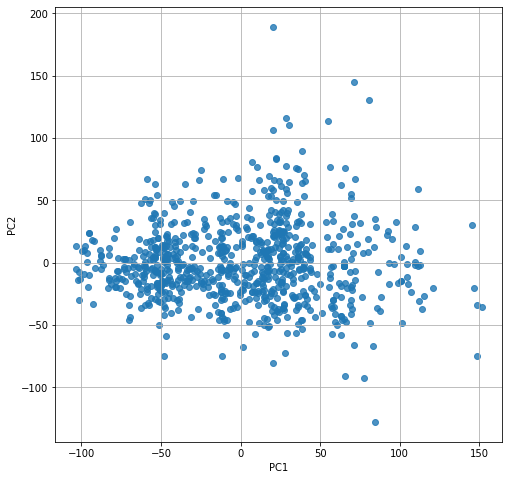

In [33]:
#主成分分析の実行
pca = PCA()
pca.fit(df.iloc[:, 5:11])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(df.iloc[:, 5:11])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

In [36]:
type1s = list(set(list(df['Type 1'])))

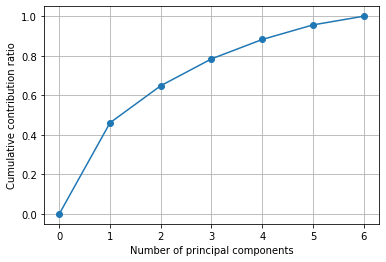

In [37]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
import numpy as np
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()

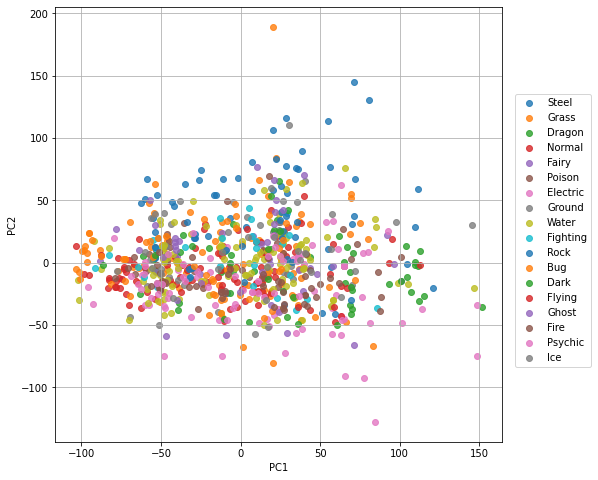

In [38]:
#主成分分析の実行
pca = PCA()
pca.fit(df.iloc[:, 5:11])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(df.iloc[:, 5:11])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for type1 in type1s:
    plt.scatter(feature[df['Type 1'] == type1, 0], feature[df['Type 1'] == type1, 1], alpha=0.8, label=type1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'upper right',
          bbox_to_anchor = (0.7, 0.7, 0.5, 0.1),
          borderaxespad = 0.0)
plt.grid()
plt.show()

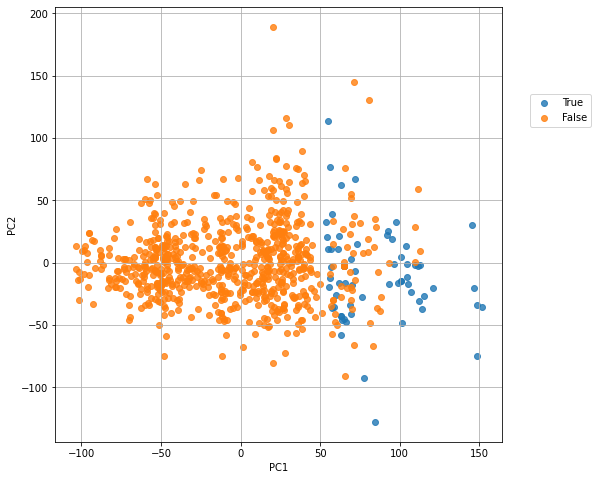

In [39]:
#主成分分析の実行
pca = PCA()
pca.fit(df.iloc[:, 5:11])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(df.iloc[:, 5:11])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for binary in [True, False]:
    plt.scatter(feature[df['Legendary'] == binary, 0], feature[df['Legendary'] == binary, 1], alpha=0.8, label=binary)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'upper right',
          bbox_to_anchor = (0.7, 0.7, 0.5, 0.1),
          borderaxespad = 0.0)
plt.grid()
plt.show()

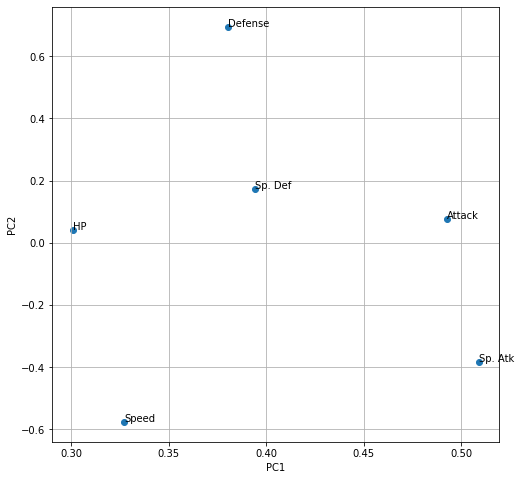

In [40]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(pca.components_[0], pca.components_[1], df.columns[5:11]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1])
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [42]:
X = df.iloc[:, [5, 6, 7, 10]]
y = df['Sp. Atk']

In [43]:
#from sklearn.cross_validation import train_test_split # 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) # 訓練データ・テストデータへのランダムな分割

In [44]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train) # 予測モデルを作成

print("回帰係数= ", regr.coef_)
print("切片= ", regr.intercept_)
print("決定係数(train)= ", regr.score(X_train, y_train))
print("決定係数(test)= ", regr.score(X_test, y_test))

回帰係数=  [0.35908571 0.0656822  0.14192794 0.49244363]
切片=  -1.1252299722582677
決定係数(train)=  0.378113290269839
決定係数(test)=  0.23805930661908203


In [45]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
print("決定係数(train)= ", regr.score(X_train, y_train))
print("決定係数(test)= ", regr.score(X_test, y_test))

決定係数(train)=  0.40343798068926806
決定係数(test)=  0.24469297622603603


# 第98章：教師あり機械学習

In [46]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib.request 
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/pima-indians-diabetes.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.request.urlretrieve(url, 'pima-indians-diabetes.txt') 

('pima-indians-diabetes.txt', <http.client.HTTPMessage at 0x7f7b9e544040>)

In [47]:
# 表計算っぽいデータ処理用ライブラリのインポート
import pandas as pd 
# データを読み込んでデータフレーム形式として保存
df = pd.read_csv('pima-indians-diabetes.txt', delimiter="\t", index_col=0)
# 中身の確認
df

,NumTimePreg,OralGluTol,BloodPres,SkinThick,SerumInsulin,BMI,PedigreeFunc,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [48]:
# 説明変数
X = df.iloc[:, :8]
# 最大値を1、最小値を0にするような正規化。
# axis=1 とすれば、列ではなく行単位で正規化します。
X = X.apply(lambda x: (x-x.min())/(x.max() - x.min()), axis=0)

In [49]:
# 目的変数
y = df.iloc[:, 8]

In [50]:
# 訓練データとテストデータに分割するメソッドのインポート
from sklearn.model_selection import train_test_split 
# 訓練データ・テストデータへ6:4の比でランダムに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) 

In [51]:
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
classifier = LogisticRegression() # 分類器の生成
classifier.fit(X_train, y_train) #学習

LogisticRegression()

In [52]:
import timeit # 実行時間を計測するためのライブラリ
timeit.timeit(lambda: classifier.fit(X_train, y_train), number=1)

0.024848915999882593

In [53]:
# 正解率 (train) : 学習に用いたデータをどのくらい正しく予測できるか
classifier.score(X_train,y_train)

0.7804347826086957

In [54]:
# 正解率 (test) : 学習に用いなかったデータをどのくらい正しく予測できるか
classifier.score(X_test,y_test)

0.7402597402597403

In [55]:
# 学習に用いなかったデータを予測する
y_pred = classifier.predict(X_test)

In [56]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [57]:
from sklearn.metrics import confusion_matrix # 混同行列を計算するメソッド
# 予測結果と、正解（本当の答え）がどのくらい合っていたかを表す混同行列
pd.DataFrame(confusion_matrix(y_pred, y_test), 
             index=['predicted 0', 'predicted 1'], columns=['real 0', 'real 1'])

,real 0,real 1
predicted 0,178,59
predicted 1,21,50


In [58]:
# 予測結果の自信の強さを計算する
y_proba = classifier.predict_proba(X_test)

In [59]:
y_proba

array([[0.56125277, 0.43874723],
       [0.77110807, 0.22889193],
       [0.77738111, 0.22261889],
       [0.86606975, 0.13393025],
       [0.90311618, 0.09688382],
       [0.40722159, 0.59277841],
       [0.88376729, 0.11623271],
       [0.22622362, 0.77377638],
       [0.85670227, 0.14329773],
       [0.57558582, 0.42441418],
       [0.80663385, 0.19336615],
       [0.38153423, 0.61846577],
       [0.53379137, 0.46620863],
       [0.24908416, 0.75091584],
       [0.8451982 , 0.1548018 ],
       [0.8315208 , 0.1684792 ],
       [0.83306473, 0.16693527],
       [0.49050612, 0.50949388],
       [0.65414871, 0.34585129],
       [0.78591605, 0.21408395],
       [0.7146137 , 0.2853863 ],
       [0.83743909, 0.16256091],
       [0.66969695, 0.33030305],
       [0.86585196, 0.13414804],
       [0.63116354, 0.36883646],
       [0.40414597, 0.59585403],
       [0.86897492, 0.13102508],
       [0.21493638, 0.78506362],
       [0.62673034, 0.37326966],
       [0.76321237, 0.23678763],
       [0.

In [60]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline

AUC curve : 0.814577


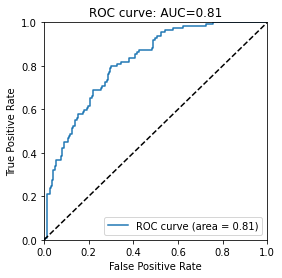

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# AUCスコアを出す
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
roc_auc = auc(fpr, tpr)
print ("AUC curve : %f" % roc_auc)

# ROC curve を描く
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: AUC=%0.2f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

AUPR score: 0.66


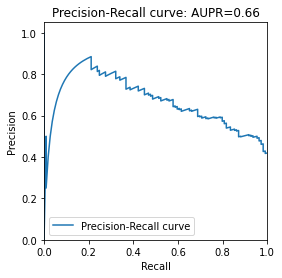

In [62]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba[:, 1])
area = auc(recall, precision)
print ("AUPR score: %0.2f" % area)

# PR curve を描く
plt.figure(figsize=(4,4))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AUPR=%0.2f' % area)
plt.legend(loc="lower left")
plt.show()

In [63]:
%%time
# ベストなパラメーターを探し当てるためのグリッドサーチ
from sklearn.model_selection import GridSearchCV

# グリッドサーチを行うためのパラメーター（LogisticRegressionのパラメーター）
parameters = [
    {'solver': ['liblinear', 'saga'], 'penalty':['l1', 'l2'], 'C': [0.1, 1, 10, 100]},
    {'solver': ['newton-cg', 'sag', 'lbfgs' ], 'penalty':['l2'], 'C': [0.1, 1, 10, 100]},
]

#グリッドサーチ実行
classifier = GridSearchCV(LogisticRegression(), parameters, cv=3, n_jobs=-1)
classifier.fit(X_train, y_train)
print("Accuracy score (train): ", classifier.score(X_train, y_train))
print("Accuracy score (test): ", classifier.score(X_test, y_test))
print(classifier.best_estimator_) # ベストのパラメーターを持つ分類器

Accuracy score (train):  0.7869565217391304
Accuracy score (test):  0.7564935064935064
LogisticRegression(C=1, penalty='l1', solver='saga')
CPU times: user 171 ms, sys: 68.3 ms, total: 239 ms
Wall time: 3.93 s


In [64]:
scores = []

In [65]:
import timeit
from sklearn import metrics
def record_classification_scores(classifier_name, classifier, iter=5):
    records = []
    for run_id in range(iter):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) 
        print('Run ', run_id + 1)
        seconds = timeit.timeit(lambda: classifier.fit(X_train, y_train), number=1)
        print('    Learning Time (s):', seconds)
        y_pred = classifier.predict(X_test)
        y_proba = classifier.predict_proba(X_test)

        accuracy_score = metrics.accuracy_score(y_test, y_pred)
        precision_score = metrics.precision_score(y_test, y_pred, average='weighted')
        recall_score = metrics.recall_score(y_test, y_pred, average='weighted')
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

        try:
            fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba[:, 1])
            roc_auc = metrics.auc(fpr, tpr)
        except:
            roc_auc = 0

        try:
            pre, rec, thresholds = metrics.precision_recall_curve(y_test, y_proba[:, 1])
            aupr = metrics.auc(rec, pre)
        except:
            aupr = 0

        try:
            mcc = metrics.matthews_corrcoef(y_test, y_pred)
        except:
            mcc = 0

        records.append([classifier_name, accuracy_score, precision_score, recall_score, 
                        f1_score, roc_auc, aupr, mcc, seconds])
    return records

In [66]:
%%time
scores += record_classification_scores('LR', classifier.best_estimator_)

Run  1
    Learning Time (s): 0.016543106000426633
Run  2
    Learning Time (s): 0.01562048899995716
Run  3
    Learning Time (s): 0.007946058999550587
Run  4
    Learning Time (s): 0.008367559999896912
Run  5
    Learning Time (s): 0.007236163000015949
CPU times: user 139 ms, sys: 2.05 ms, total: 141 ms
Wall time: 197 ms


<ipython-input-67-32afe9630ef2>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores_mean = df_scores.iloc[:, :-1].mean()
<ipython-input-67-32afe9630ef2>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores_errors = df_scores.iloc[:, :-1].std()


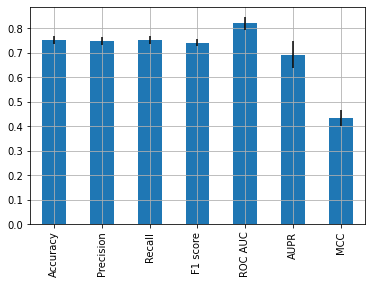

In [67]:
df_scores = pd.DataFrame(scores, columns = ['Classifier', 'Accuracy', 'Precision', 'Recall', 
                                            'F1 score', 'ROC AUC', 'AUPR', 'MCC', 'Time'])
df_scores_mean = df_scores.iloc[:, :-1].mean()
df_scores_errors = df_scores.iloc[:, :-1].std()
df_scores_mean.plot(kind='bar', grid=True, yerr=df_scores_errors)

In [68]:
%%time
# ベストなパラメーターを探し当てるためのグリッドサーチ
from sklearn.model_selection import GridSearchCV

# 勾配ブースティング
from sklearn.ensemble import GradientBoostingClassifier

# グリッドサーチを行うためのパラメーター
parameters = [{
    'loss': ['deviance', 'exponential'],
    'learning_rate':[0.1,0.2],
    'n_estimators':[20,100,200],
    'max_depth':[3,5,7,9]
}]

#グリッドサーチ実行
classifier = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1)
classifier.fit(X_train, y_train)
print("Accuracy score (train): ", classifier.score(X_train, y_train))
print("Accuracy score (test): ", classifier.score(X_test, y_test))
print(classifier.best_estimator_) # ベストのパラメーター

Accuracy score (train):  0.8978260869565218
Accuracy score (test):  0.7305194805194806
GradientBoostingClassifier(learning_rate=0.2, n_estimators=20)
CPU times: user 654 ms, sys: 81.5 ms, total: 736 ms
Wall time: 40.4 s


In [69]:
%%time
scores += record_classification_scores('GB', classifier.best_estimator_)

Run  1
    Learning Time (s): 0.09337150200008182
Run  2
    Learning Time (s): 0.0487619289997383
Run  3
    Learning Time (s): 0.0716442429993549
Run  4
    Learning Time (s): 0.04069243599951733
Run  5
    Learning Time (s): 0.07170801899974322
CPU times: user 315 ms, sys: 0 ns, total: 315 ms
Wall time: 446 ms


In [70]:
import matplotlib.pyplot as plt
def visualize_classification_result(scores):
    df_scores = pd.DataFrame(scores, columns = ['Classifier', 'Accuracy', 'Precision', 'Recall', 
                                            'F1 score', 'ROC AUC', 'AUPR', 'MCC', 'Time'])
    df_scores_mean = df_scores.iloc[:, :-1].groupby('Classifier').mean()
    df_scores_errors = df_scores.iloc[:, :-1].groupby('Classifier').std()
    df_scores_mean.T.plot(kind='bar', grid=True, yerr=df_scores_errors.T, 
                          figsize=(12, 2), legend=False)
    plt.legend(loc = 'right', bbox_to_anchor = (0.7, 0.5, 0.5, 0.0))
    df_scores_mean.plot(kind='bar', grid=True, yerr=df_scores_errors, 
                        figsize=(12, 2), legend=False)
    plt.legend(loc = 'right', bbox_to_anchor = (0.7, 0.5, 0.5, 0.0))

    df_time_mean = df_scores.iloc[:, [0, -1]].groupby('Classifier').mean()
    df_time_errors = df_scores.iloc[:, [0, -1]].groupby('Classifier').std()
    df_time_mean.plot(kind='bar', grid=True, yerr=df_time_errors, 
                        figsize=(12, 2), legend=False)
    plt.yscale('log')

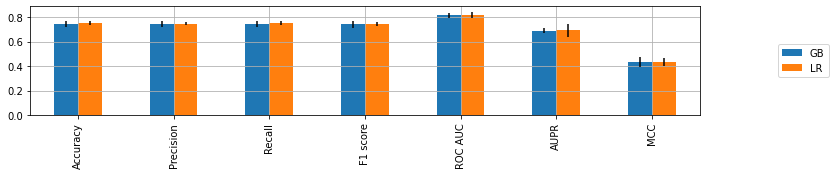

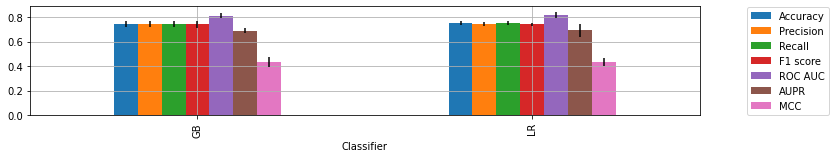

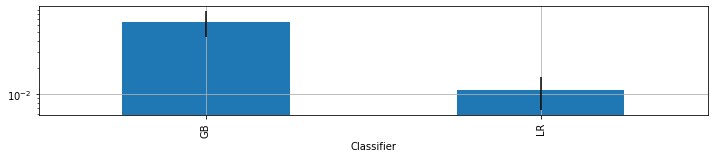

In [71]:
visualize_classification_result(scores)

In [72]:
%%time
# ベストなパラメーターを探し当てるためのグリッドサーチ
from sklearn.model_selection import GridSearchCV

# 多層パーセプトロン
from sklearn.neural_network import MLPClassifier
# グリッドサーチを行うためのパラメーター
parameters = [{'hidden_layer_sizes': [8, (8, 8), (8, 8, 8)], 
               'solver': ['sgd', 'adam', 'lbfgs'],
                     'activation': ['logistic', 'tanh', 'relu'],
              'learning_rate_init': [0.1, 0.01, 0.001]}]
#グリッドサーチ実行
classifier = GridSearchCV(MLPClassifier(max_iter=10000, early_stopping=True), 
                          parameters, cv=3, n_jobs=-1)
classifier.fit(X_train, y_train)
print("Accuracy score (train): ", classifier.score(X_train, y_train))
print("Accuracy score (test): ", classifier.score(X_test, y_test))
print(classifier.best_estimator_) # ベストのパラメーターを持つ分類器

Accuracy score (train):  0.8630434782608696
Accuracy score (test):  0.7467532467532467
MLPClassifier(early_stopping=True, hidden_layer_sizes=(8, 8, 8),
              learning_rate_init=0.01, max_iter=10000, solver='lbfgs')
CPU times: user 2.76 s, sys: 216 ms, total: 2.98 s
Wall time: 4min 17s


In [73]:
%%time
scores += record_classification_scores('MLP', classifier.best_estimator_)

Run  1
    Learning Time (s): 0.7137912399994093
Run  2
    Learning Time (s): 0.8377399979999609
Run  3
    Learning Time (s): 0.011784189000536571
Run  4


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    Learning Time (s): 1.143792387000758
Run  5
    Learning Time (s): 1.1102812409999387
CPU times: user 3.86 s, sys: 466 µs, total: 3.86 s
Wall time: 3.88 s


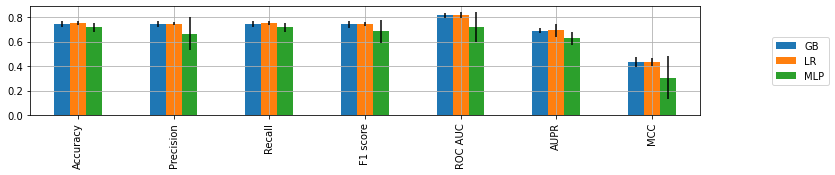

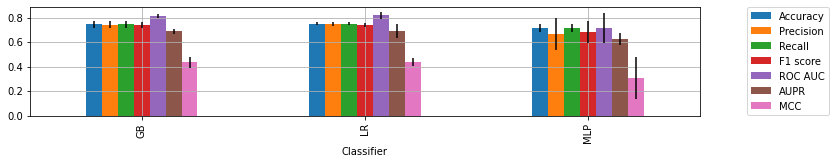

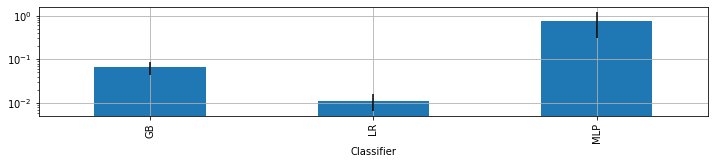

In [74]:
visualize_classification_result(scores)